# Pneumonia Detection using CNN



```
อันนี้คืออันที่ aug แต่ใช้ข้อมูลที่เท่ากัน
```



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
import pandas as pd
import os
from skimage.io import imread
from skimage.io import imshow
import matplotlib.pyplot as plt
import seaborn as sns

## 1. **Data exploration** 📊

**❗❓หมายเหตุ:**

ข้อมูล DataFrame ทั้งหมด ใน 1. Data exploration นี้ ใช้เฉพาะการ Data exploration เท่านั้นนะคะ ไม่ได้ใช้สำหรับการ Preprocess data และ Train Model

### 1.1 Training set

#### Normal train set




In [26]:
normal_train_directory = '/content/drive/MyDrive/ColabNotebooks/Pneumonia/chest_xray5050/train/NORMAL/'

# list ชื่อไฟล์ที่อยู่ใน normal_train_directory
normal_train_images = os.listdir(normal_train_directory)

normal_train_label = []

# ใส่ label ให้กับข้อมูล
for file in normal_train_images:
  normal_train_label.append('Normal')

# สร้าง dataframe ของ normal_train_df
normal_train_df = pd.DataFrame({
    'image': normal_train_images,
    'label': normal_train_label
})

normal_train_df.sample(5)

,image,label
16,IM-0551-0001-0001.jpeg,Normal
287,NORMAL2-IM-0417-0001.jpeg,Normal
174,IM-0662-0001.jpeg,Normal
1315,IM-0521-0001.jpeg,Normal
869,NORMAL2-IM-1200-0001.jpeg,Normal


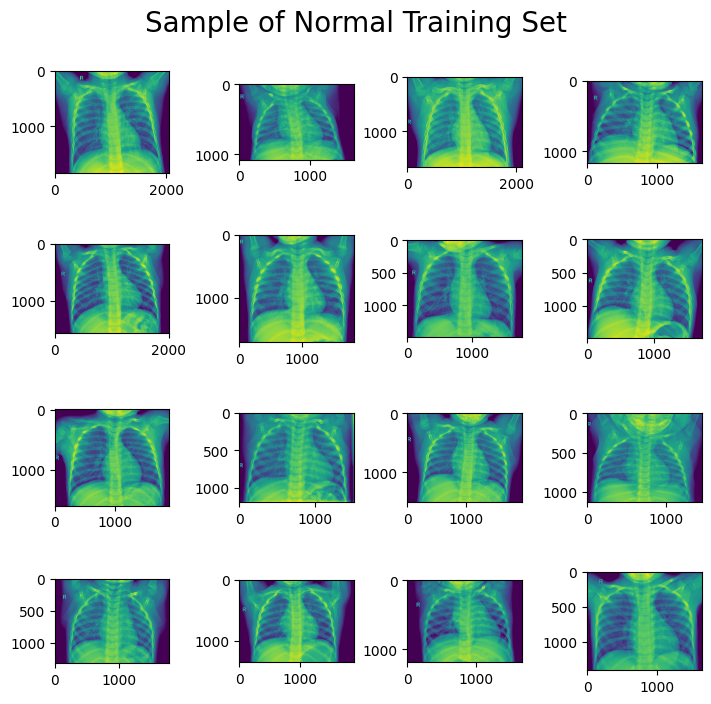

In [14]:
## plot กราฟย่อย
# โดยใส่กราฟได้ 4*4 และมีขนาดแต่ของละกราฟเป็น 7*7 --- constrained_layout=True เป็นการปรับขนาดโดยรวมของกราฟให้มีระยะห่างที่พอดี ไม่แคบเกินไป
fig,ax = plt.subplots(4,4,figsize=(7,7),constrained_layout=True)

# ใส่ชื่อกราฟตรงกลาง
plt.suptitle('Sample of Normal Training Set', fontsize=20)

## ใช้ for loop เพื่อ plot ทีละรูป
for i, row in normal_train_df.iterrows():
  # directory ของรูป
  digit = row['image']
  img = imread(normal_train_directory + digit)

  # plot
  ax = ax.flatten()
  ax[i].imshow(img)
  #ax[i].set_title(digit) # ชื่อไฟล์รูป

  # นับรอบ ให้ครบจำนวนกราฟย่อยที่กำหนดไปตอนต้น
  i = i + 1
  if i == 16:
    break

plt.show()


#### Pneumonia train set

In [29]:
pneumonia_train_directory = '/content/drive/MyDrive/ColabNotebooks/Pneumonia/chest_xray5050/train/PNEUMONIA/'

# list ชื่อไฟล์ที่อยู่ใน pneumonia_train_directory
pneumonia_train_images = os.listdir(pneumonia_train_directory)

pneumonia_train_label = []

# ใส่ label ให้กับข้อมูล
for file in pneumonia_train_images:
  pneumonia_train_label.append('Pneumonia')

# สร้าง dataframe ของ pneumonia_train_df
pneumonia_train_df = pd.DataFrame({
    'image': pneumonia_train_images,
    'label': pneumonia_train_label
})

pneumonia_train_df.sample(5)

,image,label
1152,person20_bacteria_69.jpeg,Pneumonia
213,person330_virus_683.jpeg,Pneumonia
333,person348_virus_723.jpeg,Pneumonia
814,person51_bacteria_246.jpeg,Pneumonia
860,person52_bacteria_249.jpeg,Pneumonia


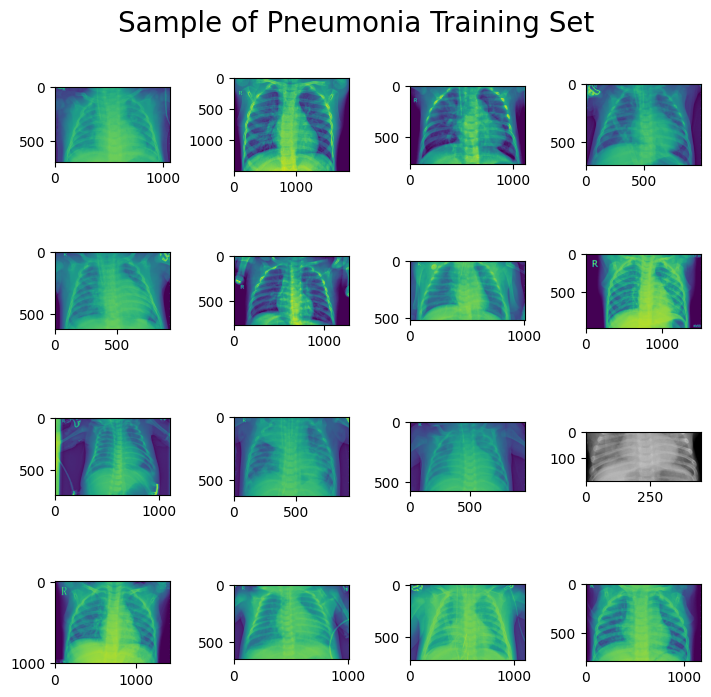

In [19]:
## plot กราฟย่อย
# โดยใส่กราฟได้ 4*4 และมีขนาดแต่ของละกราฟเป็น 7*7 --- constrained_layout=True เป็นการปรับขนาดโดยรวมของกราฟให้มีระยะห่างที่พอดี ไม่แคบเกินไป
fig,ax = plt.subplots(4,4,figsize=(7,7),constrained_layout=True)

# ใส่ชื่อกราฟตรงกลาง
plt.suptitle('Sample of Pneumonia Training Set', fontsize=20)

## ใช้ for loop เพื่อ plot ทีละรูป
for i, row in pneumonia_train_df.iterrows():
  # directory ของรูป
  digit = row['image']
  img = imread(pneumonia_train_directory + digit)

  # plot
  ax = ax.flatten()
  ax[i].imshow(img)
  #ax[i].set_title(digit) # ชื่อไฟล์รูป

  # นับรอบ ให้ครบจำนวนกราฟย่อยที่กำหนดไปตอนต้น
  i = i + 1
  if i == 16:
    break

plt.show()


In [31]:
print('Total Normal and Pneumonia training set image: ',  int(normal_train_df['label'].value_counts()) +  int(pneumonia_train_df['label'].value_counts()))

Total Normal and Pneumonia training set image:  2680


In [33]:
train_df =  pd.concat([normal_train_df, pneumonia_train_df])
train_df

,image,label
0,IM-0511-0001.jpeg,Normal
1,IM-0522-0001.jpeg,Normal
2,IM-0517-0001-0001.jpeg,Normal
3,IM-0523-0001-0003.jpeg,Normal
4,IM-0519-0001-0002.jpeg,Normal
...,...,...
1335,person281_virus_578.jpeg,Pneumonia
1336,person301_bacteria_1427.jpeg,Pneumonia
1337,person279_bacteria_1315.jpeg,Pneumonia
1338,person296_bacteria_1391.jpeg,Pneumonia


[Text(0.5, 1.0, 'No. of training set image')]

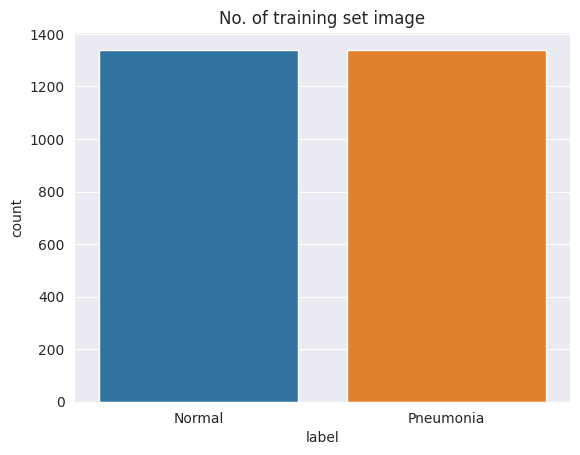

In [44]:
sns.set_style('darkgrid')
sns.countplot(train_df, x="label").set(title='No. of training set image')

ใน training set ทั้งสอง class มีจำนวนรูปภาพเท่ากัน

### 1.2 Test set

#### Normal test set




In [36]:
normal_test_directory = '/content/drive/MyDrive/ColabNotebooks/Pneumonia/chest_xray5050/test/NORMAL/'

# list ชื่อไฟล์ที่อยู่ใน normal_test_directory
normal_test_images = os.listdir(normal_test_directory)

normal_test_label = []

# ใส่ label ให้กับข้อมูล
for file in normal_test_images:
  normal_test_label.append('Normal')

# สร้าง dataframe ของ normal_test_df
normal_test_df = pd.DataFrame({
    'image': normal_test_images,
    'label': normal_test_label
})

normal_test_df.sample(5)

,image,label
100,NORMAL2-IM-0283-0001.jpeg,Normal
170,NORMAL2-IM-0309-0001.jpeg,Normal
115,NORMAL2-IM-0311-0001.jpeg,Normal
31,NORMAL2-IM-0059-0001.jpeg,Normal
224,NORMAL2-IM-0362-0001.jpeg,Normal


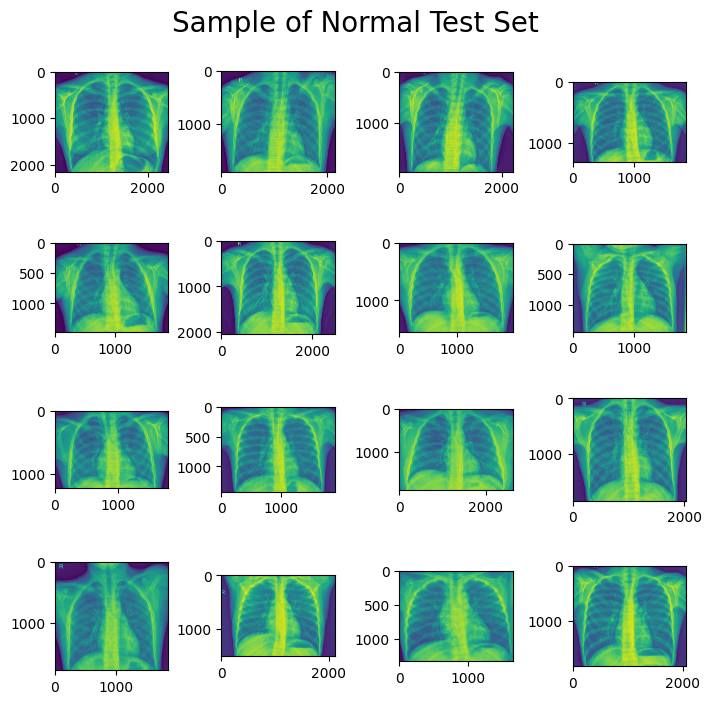

In [37]:
## plot กราฟย่อย
# โดยใส่กราฟได้ 4*4 และมีขนาดแต่ของละกราฟเป็น 7*7 --- constrained_layout=True เป็นการปรับขนาดโดยรวมของกราฟให้มีระยะห่างที่พอดี ไม่แคบเกินไป
fig,ax = plt.subplots(4,4,figsize=(7,7),constrained_layout=True)

# ใส่ชื่อกราฟตรงกลาง
plt.suptitle('Sample of Normal Test Set', fontsize=20)

## ใช้ for loop เพื่อ plot ทีละรูป
for i, row in normal_test_df.iterrows():
  # directory ของรูป
  digit = row['image']
  img = imread(normal_test_directory + digit)

  # plot
  ax = ax.flatten()
  ax[i].imshow(img)
  #ax[i].set_title(digit) # ชื่อไฟล์รูป

  # นับรอบ ให้ครบจำนวนกราฟย่อยที่กำหนดไปตอนต้น
  i = i + 1
  if i == 16:
    break

plt.show()


#### Pneumonia train set

In [38]:
pneumonia_test_directory = '/content/drive/MyDrive/ColabNotebooks/Pneumonia/chest_xray5050/test/PNEUMONIA/'

# list ชื่อไฟล์ที่อยู่ใน pneumonia_test_directory
pneumonia_test_images = os.listdir(pneumonia_test_directory)

pneumonia_test_label = []

# ใส่ label ให้กับข้อมูล
for file in pneumonia_test_images:
  pneumonia_test_label.append('Pneumonia')

# สร้าง dataframe ของ pneumonia_test_df
pneumonia_test_df = pd.DataFrame({
    'image': pneumonia_test_images,
    'label': pneumonia_test_label
})

pneumonia_test_df.sample(5)

,image,label
220,person70_virus_130.jpeg,Pneumonia
40,person110_bacteria_531.jpeg,Pneumonia
169,person71_virus_132.jpeg,Pneumonia
120,person57_virus_113.jpeg,Pneumonia
192,person95_bacteria_463.jpeg,Pneumonia


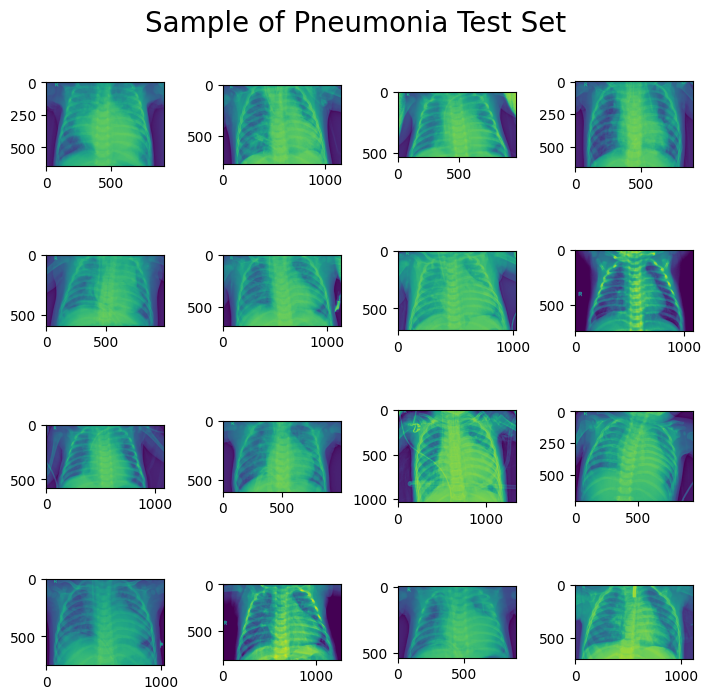

In [39]:
## plot กราฟย่อย
# โดยใส่กราฟได้ 4*4 และมีขนาดแต่ของละกราฟเป็น 7*7 --- constrained_layout=True เป็นการปรับขนาดโดยรวมของกราฟให้มีระยะห่างที่พอดี ไม่แคบเกินไป
fig,ax = plt.subplots(4,4,figsize=(7,7),constrained_layout=True)

# ใส่ชื่อกราฟตรงกลาง
plt.suptitle('Sample of Pneumonia Test Set', fontsize=20)

## ใช้ for loop เพื่อ plot ทีละรูป
for i, row in pneumonia_test_df.iterrows():
  # directory ของรูป
  digit = row['image']
  img = imread(pneumonia_test_directory + digit)

  # plot
  ax = ax.flatten()
  ax[i].imshow(img)
  #ax[i].set_title(digit) # ชื่อไฟล์รูป

  # นับรอบ ให้ครบจำนวนกราฟย่อยที่กำหนดไปตอนต้น
  i = i + 1
  if i == 16:
    break

plt.show()


In [40]:
print('Total Normal and Pneumonia test set image: ',  int(normal_test_df['label'].value_counts()) +  int(pneumonia_test_df['label'].value_counts()))

Total Normal and Pneumonia test set image:  479


In [41]:
test_df =  pd.concat([normal_test_df, pneumonia_test_df])
test_df

,image,label
0,IM-0013-0001.jpeg,Normal
1,IM-0011-0001-0001.jpeg,Normal
2,IM-0011-0001-0002.jpeg,Normal
3,IM-0001-0001.jpeg,Normal
4,IM-0010-0001.jpeg,Normal
...,...,...
240,person48_virus_100.jpeg,Pneumonia
241,person85_bacteria_421.jpeg,Pneumonia
242,person85_bacteria_419.jpeg,Pneumonia
243,person77_virus_139.jpeg,Pneumonia


[Text(0.5, 1.0, 'No. of test set image')]

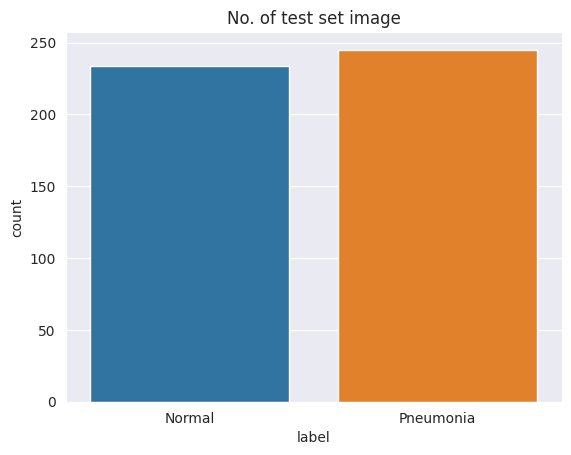

In [45]:
sns.set_style('darkgrid')
sns.countplot(test_df, x="label").set(title='No. of test set image')

ใน test set pneumonia จะมีจำนวนมากกว่า normal ไม่มากนัก

## **2. Preprocess data** 📑

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_dir = '/content/drive/MyDrive/ColabNotebooks/Pneumonia/chest_xray5050/train'
val_dir = '/content/drive/MyDrive/ColabNotebooks/Pneumonia/chest_xray5050/test'


target_img_shape=(64, 64)

train_datagen = ImageDataGenerator(rescale = 1./255,
                                    rotation_range=30,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    shear_range=0.2,
                                    zoom_range=0.2,
                                    horizontal_flip=True,
                                    fill_mode='nearest'
                                   )

train_set = train_datagen.flow_from_directory(train_dir,
                                                 target_size=target_img_shape,
                                                 batch_size=32,
                                                 class_mode='binary')

Found 2680 images belonging to 2 classes.


In [ ]:
val_datagen = ImageDataGenerator(rescale = 1./255)
val_set = val_datagen.flow_from_directory(val_dir,
                                            target_size=target_img_shape,
                                            batch_size=32,
                                            class_mode='binary')

Found 479 images belonging to 2 classes.


In [ ]:
print('Training')
ids, counts = np.unique(train_set.classes, return_counts=True)

print(ids)
print(counts)

Training
[0 1]
[1340 1340]


In [ ]:
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
labels

for i in ids:
    print('{:>6} = {}' . format(labels[i], counts[i]))

NORMAL = 1340
PNEUMONIA = 1340


In [ ]:
print('Validation')
ids, counts = np.unique(val_set.classes, return_counts=True)

print(ids)
print(counts)

Validation
[0 1]
[234 245]


In [ ]:
labels = (train_set.class_indices)
labels = dict((v,k) for k,v in labels.items())
labels

for i in ids:
    print('{:>6} = {}' . format(labels[i], counts[i]))

NORMAL = 234
PNEUMONIA = 245


In [ ]:

_, train_count = np.unique(train_set.classes, return_counts=True)
_, val_count = np.unique(val_set.classes, return_counts=True)

print('Ratio Validation/Training set:',
      val_count/(train_count+val_count) * 100)

Ratio Validation/Training set: [14.86658196 15.45741325]


In [ ]:
train_set[0][0][0].shape

(64, 64, 3)

{'NORMAL': 0, 'PNEUMONIA': 1}
(32, 64, 64, 3)
(32,)
class: 1.0


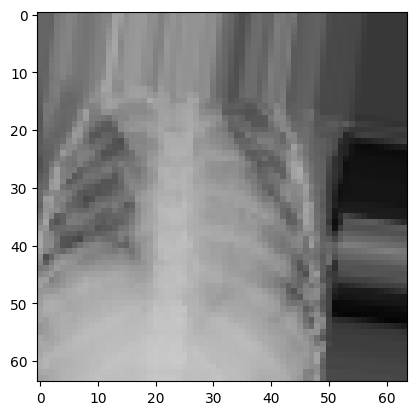

In [ ]:
print(train_set.class_indices)

for image_batch, labels_batch in train_set:
    print(image_batch.shape)
    print(labels_batch.shape)
    plt.imshow(image_batch[0])
    print('class:', labels_batch[0])

    break

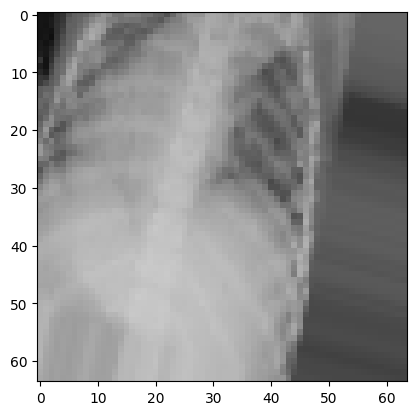

In [ ]:
plt.imshow(train_set[0][0][0])
plt.show()

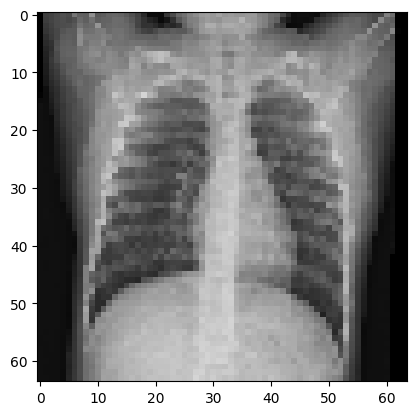

In [ ]:
plt.imshow(val_set[0][0][0])
plt.show()

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 4, figsize=(10,10))
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

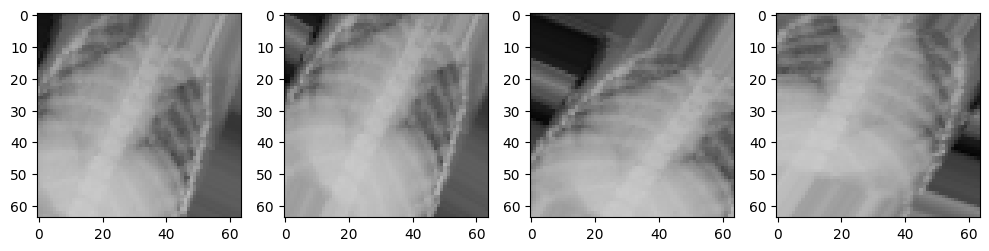

In [ ]:
augmented_images = [train_set[0][0][0] for i in range(4)]
plotImages(augmented_images)

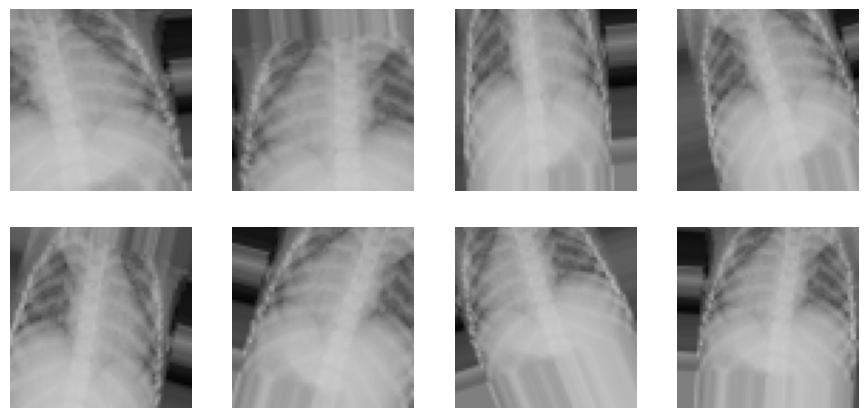

In [ ]:
nplots = 8

def visual_multi(images_arr):
    fig = plt.figure(figsize=(11, 8))
    for j in range(nplots):

        plt.subplot(3, 4, j+1)
        plt.imshow(images_arr[j])

        plt.axis('off')

    plt.show()


augmented_images = [train_set[0][0][0] for i in range(nplots)]
visual_multi(augmented_images)

## **3. Build convolutional neural network 📦**

In [ ]:
in_shape=(target_img_shape[0],target_img_shape[1],3)
in_shape

(64, 64, 3)

In [ ]:

from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Conv2D, AveragePooling2D,
Flatten, Dropout, MaxPool2D )

model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=in_shape))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Flatten())

model.add(Dense(128, activation='relu'))  #
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)         0

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

## **4. Train Model 📄**

In [ ]:
import time
start = time.time()

history = model.fit(train_set, steps_per_epoch=len(train_set),
                     validation_data=val_set,
                    epochs=20,
                    verbose=1)

end = time.time()
print("Time Taken: {:.2f} minutes".format((end - start)/60))

Epoch 1/20
84/84 [==============================] - 787s 9s/step - loss: 0.6231 - accuracy: 0.6575 - val_loss: 0.6516 - val_accuracy: 0.6221
Epoch 2/20
84/84 [==============================] - 45s 540ms/step - loss: 0.4533 - accuracy: 0.7978 - val_loss: 0.8039 - val_accuracy: 0.6639
Epoch 3/20
84/84 [==============================] - 45s 537ms/step - loss: 0.3758 - accuracy: 0.8310 - val_loss: 0.4127 - val_accuracy: 0.8142
Epoch 4/20
84/84 [==============================] - 44s 530ms/step - loss: 0.3564 - accuracy: 0.8418 - val_loss: 0.3897 - val_accuracy: 0.8100
Epoch 5/20
84/84 [==============================] - 43s 512ms/step - loss: 0.3327 - accuracy: 0.8582 - val_loss: 0.6042 - val_accuracy: 0.7182
Epoch 6/20
84/84 [==============================] - 43s 511ms/step - loss: 0.3066 - accuracy: 0.8705 - val_loss: 0.5485 - val_accuracy: 0.7390
Epoch 7/20
84/84 [==============================] - 43s 517ms/step - loss: 0.2968 - accuracy: 0.8761 - val_loss: 0.4825 - val_accuracy: 0.7432
E

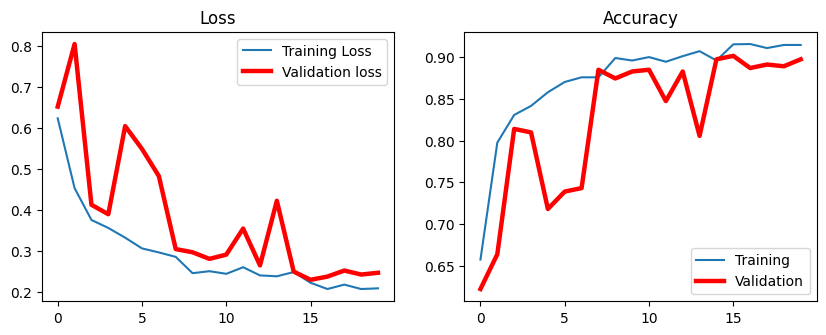

In [ ]:
plt.figure(figsize=(10, 3.5))
plt.subplot(1, 2, 1)

plt.title('Loss')
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'],'r', lw=3.2, label='Validation loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.title('Accuracy')

plt.plot(history.history['accuracy'], label='Training')
plt.plot(history.history['val_accuracy'], 'r', lw=3.2, label='Validation')
plt.legend()
plt.show()

## **5. Evaluate Model ✅**

In [ ]:
acc = model.evaluate(val_set, steps=len(val_set), verbose=0)
print('score = {:.3f}' .format(acc[1]))

score = 0.898


In [ ]:
acc

[0.2472510039806366, 0.8977035284042358]



---



## **ลองทำนายกับรูปอื่น ๆ ดู**

### แบบ load รูปทีละรูป

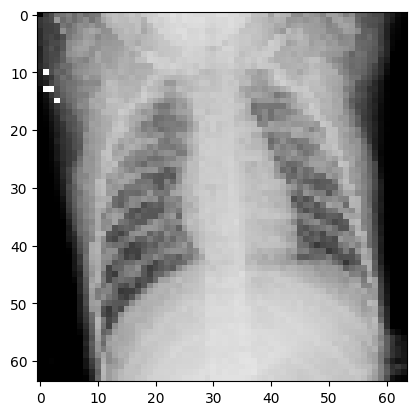

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array

target_img_shape=(64, 64)

test_image = image.load_img('/content/NORMAL2-IM-1438-0001.jpeg', target_size=target_img_shape)

test_image = image.img_to_array(test_image)
test_image /= 255.0

plt.tight_layout()
plt.imshow(test_image)
plt.show()

In [ ]:
test_image = np.expand_dims(test_image, axis=0)
test_image.shape

(1, 64, 64, 3)

In [ ]:
result = model.predict(test_image)
result

1/1 [==============================] - 0s 195ms/step


array([[0.36861783]], dtype=float32)

In [ ]:
train_set.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [ ]:
if result[0][0] > 0.5:
    predict='PNEUMONIA'
else:
    predict='NORMAL'

print(predict)

NORMAL


In [ ]:
cls = 'PNEUMONIA' if result[0][0] > 0.5 else 'NORMAL'
cls

'NORMAL'

### แบบ load รูปจากทั้ง folder

In [ ]:
from tensorflow.keras.preprocessing.image import load_img, img_to_array

def predict_chest_xray(lst):
    y_pred = [] ; y_pred_cls = []; img_lst = []
    for i in lst:

        img = load_img(i, target_size=target_img_shape)
        img = img_to_array(img)
        img /= 255.0


        img_lst.append(img)

        img = np.expand_dims(img, axis=0)

        y_pred_i = model.predict(img)
        y_pred_cls_i = 'PNEUMONIA' if y_pred_i > 0.5 else 'NORMAL'

        y_pred.append(y_pred_i)
        y_pred_cls.append(y_pred_cls_i)

    return img_lst, y_pred_cls, y_pred

In [ ]:
import glob
import os


mylist = [f for f in glob.glob('/content/drive/MyDrive/ColabNotebooks/Pneumonia/chest_xray_data/val/*')]

img_lst,y_pred_cls,y_pred = predict_chest_xray(mylist)

mylist
for i in mylist:
    print(os.path.basename(i), end=' | ')

1/1 [==============================] - 0s 21ms/step
NORMAL2-IM-1442-0001.jpeg | person1946_bacteria_4875.jpeg | person1947_bacteria_4876.jpeg | NORMAL2-IM-1437-0001.jpeg | person1954_bacteria_4886.jpeg | NORMAL2-IM-1431-0001.jpeg | NORMAL2-IM-1430-0001.jpeg | NORMAL2-IM-1427-0001.jpeg | person1951_bacteria_4882.jpeg | NORMAL2-IM-1438-0001.jpeg | person1950_bacteria_4881.jpeg | person1949_bacteria_4880.jpeg | person1946_bacteria_4874.jpeg | NORMAL2-IM-1436-0001.jpeg | NORMAL2-IM-1440-0001.jpeg | person1952_bacteria_4883.jpeg | 

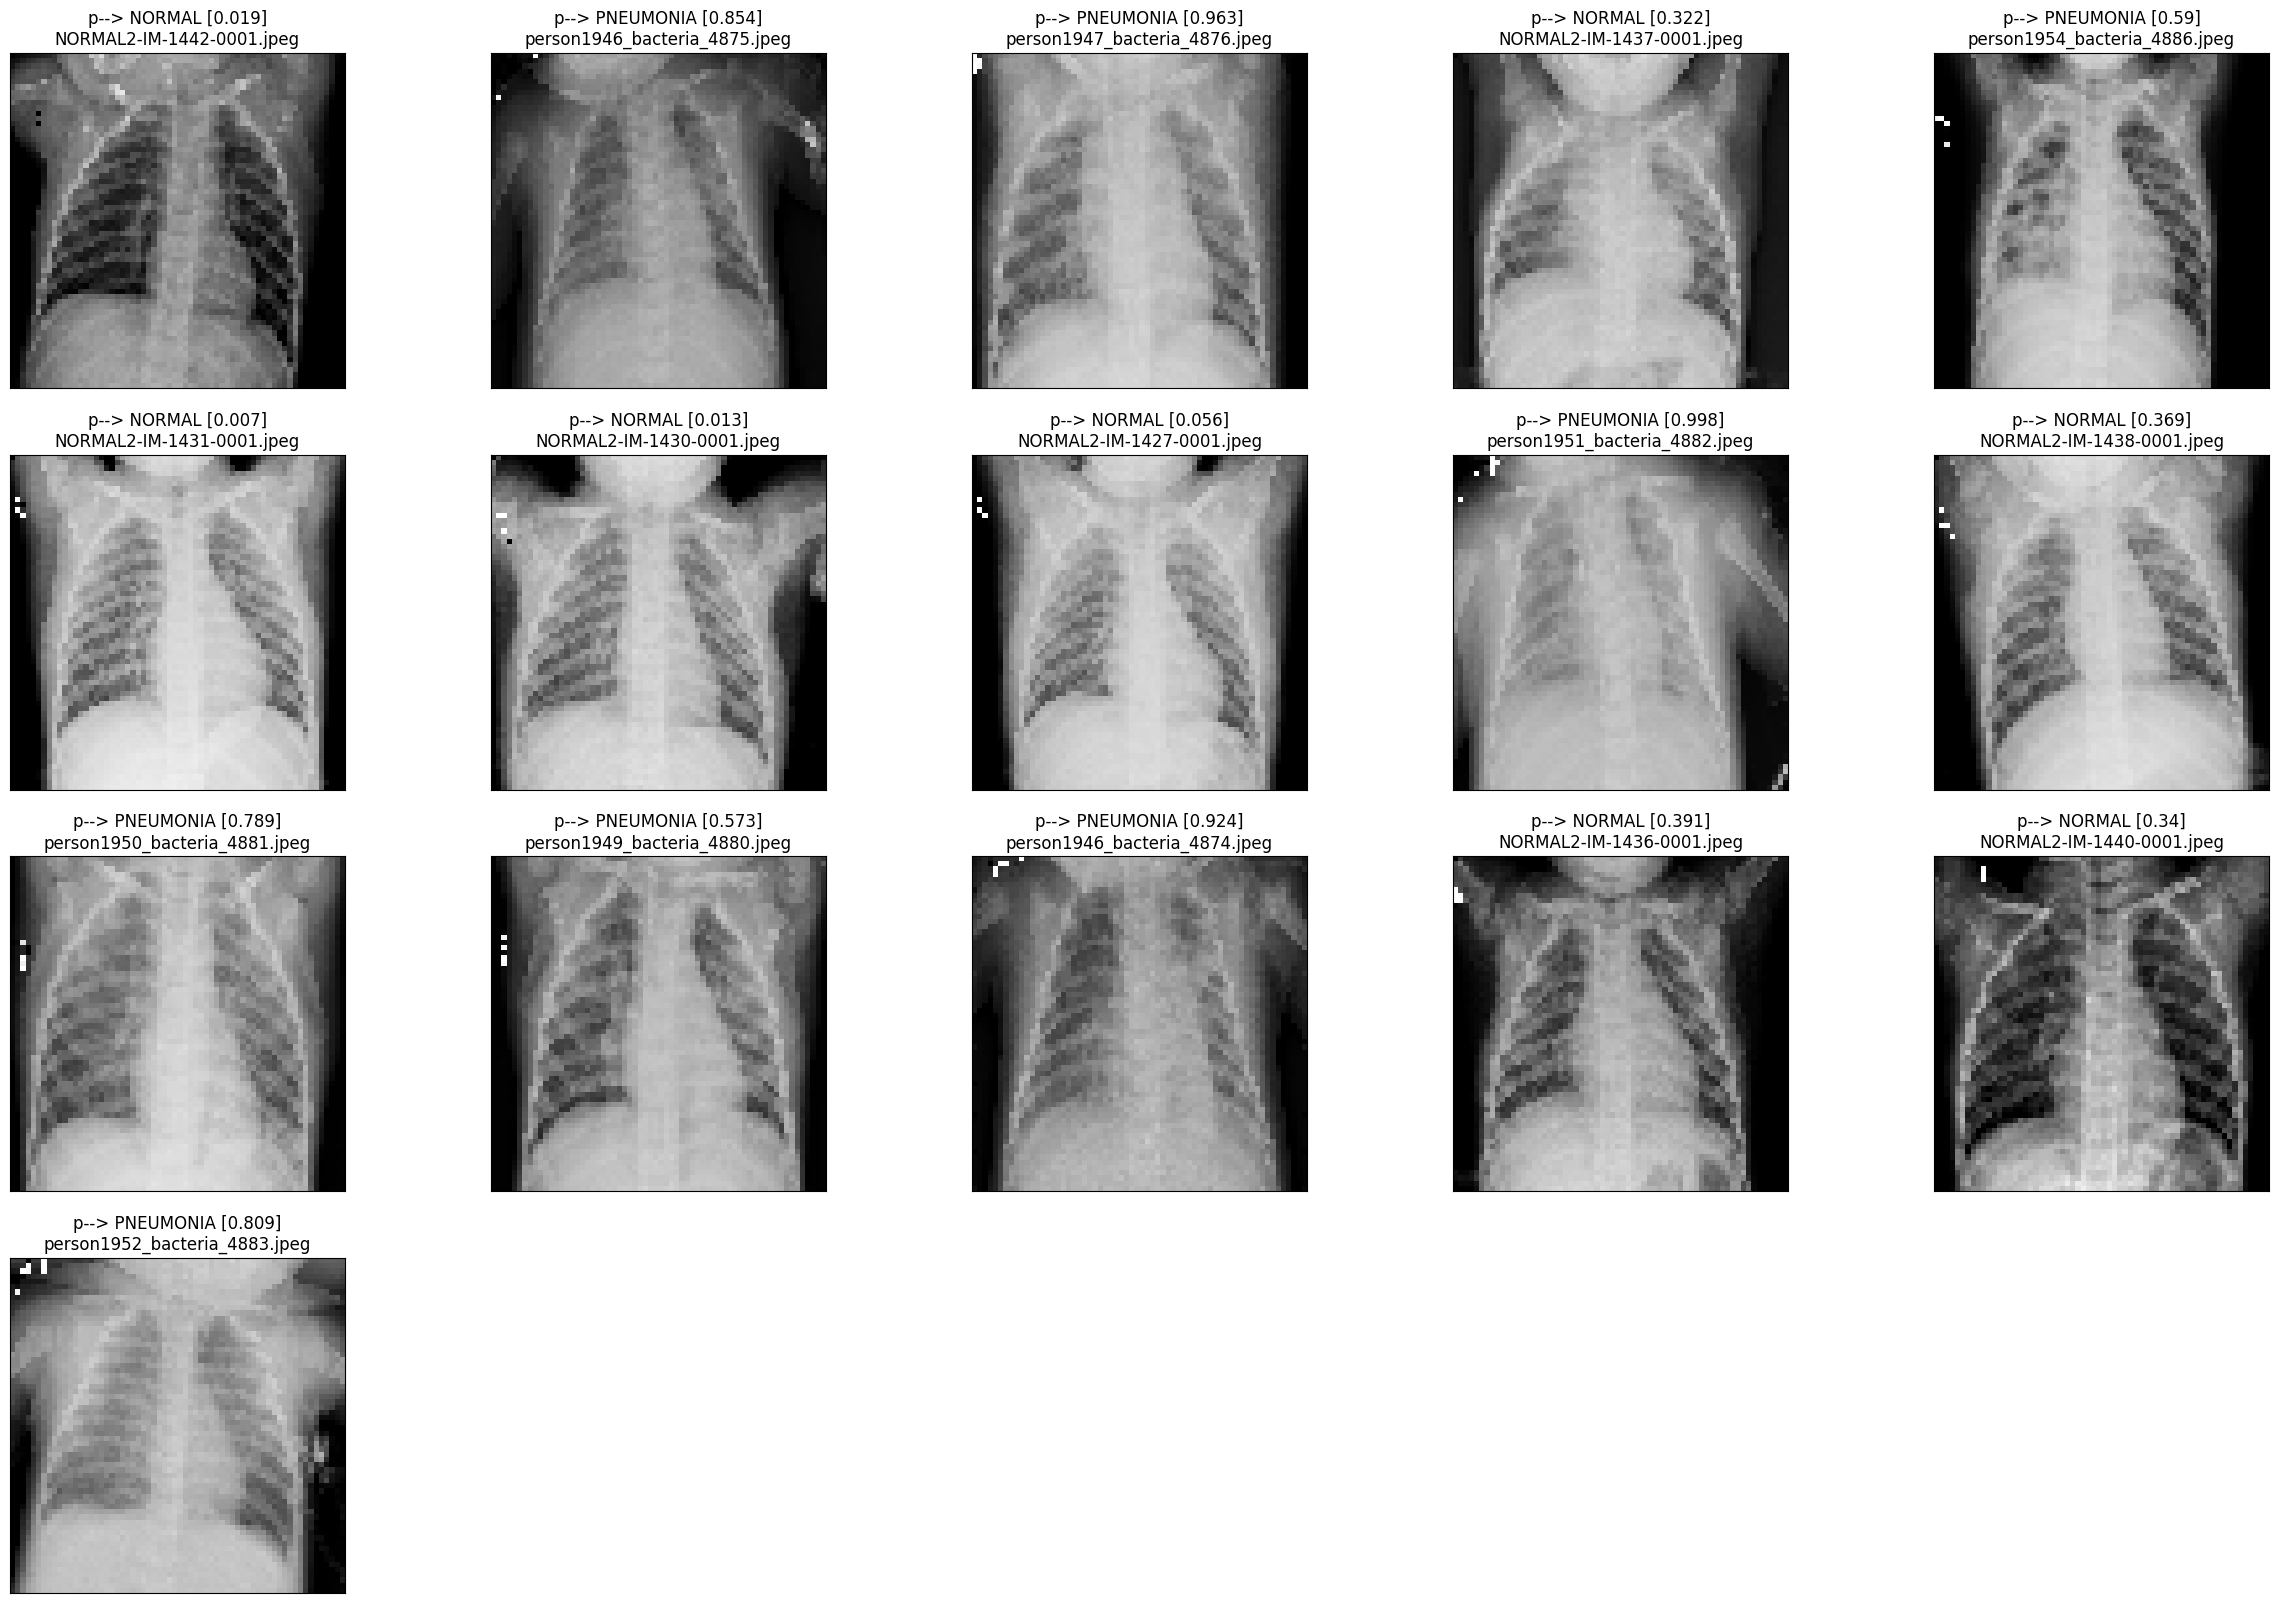

In [ ]:
nplots = 20

fig = plt.figure(figsize=(30, 20))

for i, k in enumerate(img_lst):

    plt.subplot(nplots//5, 5, i+1)
    plt.imshow(k, cmap=plt.cm.gray_r)
    plt.title('p--> {} {}'.format(y_pred_cls[i],y_pred[i][0].round(3)))

    fname = os.path.basename(mylist[i])
    plt.title('p--> {} {}\n{}'.format(y_pred_cls[i],y_pred[i][0].round(3), fname))

    plt.xticks([])
    plt.yticks([])

    if i >= nplots-1:
        break

plt.show()



---



## Save model

In [ ]:
# save model ไว้ใช้ต่อได้
model.save('pneumonia_5050.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(




---



## Load model มาใช้ต่อ

In [ ]:
from keras import models
from keras.models import Sequential, Model

model = models.load_model('/content/pneumonia_5050.h5') # Load model มาใช้ต่อ

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 31, 31, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 6, 6, 128)         0

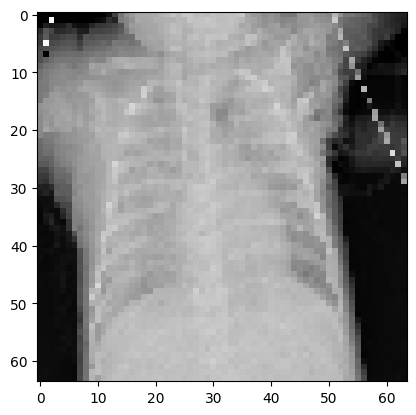

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img, img_to_array

target_img_shape=(64, 64)

test_image = image.load_img('/content/person1945_bacteria_4872.jpeg', target_size=target_img_shape)

test_image = image.img_to_array(test_image)
test_image /= 255.0

plt.tight_layout()
plt.imshow(test_image)
plt.show()

In [ ]:
test_image = np.expand_dims(test_image, axis=0)
# test_image.shape

result = model.predict(test_image)
print(result)

cls = 'PNEUMONIA' if result[0][0] > 0.5 else 'NORMAL'
print(cls)

1/1 [==============================] - 0s 19ms/step
[[0.9989305]]
PNEUMONIA
